# 1 Dataset construction
## Core of meta structure-based molecular representation learning is translate molecule smiles to meta structure smiles
- input: SMILES of molecules
- output: meta structure embedding

In [28]:
from masskg import *
from rdkit import RDLogger

RDLogger.DisableLog("rdApp.*")

molecules = ['O=C(OC1C(O)C(O)C(OC1OC2(OC(CO)C(O)C2O)CO)CO)C3=CC(O)=C(O)C(O)=C3','OCC1OC(OC2C(O)C(OC)OC(COC3OCC(O)C(O)C3O)C2O)C(O)C(O)C1O']
frag_smiles = [fragments_generation(x) if len(x)<=202 else set(x) for x in molecules]
print(frag_smiles)

[{'O=C(CC=C(O)C(O)=CO)OC(COC1(CO)OC(CO)C(O)C1O)C(O)C(O)CCO', 'CC1OC(OC2(CO)OC(CO)C(O)C2O)C(OC(=O)C2:C:C:C(O):C(O):C:2)C(O)C1O', 'O=C(OC1C(OC(CO)OC(CO)CO)OCC(O)C1O)C1:C:C(O):C(O):C(O):C:1', 'CC(=O)OC(COC1(CO)OC(CO)C(O)C1O)C(O)CO', 'CC(=O)OCCOC1(CO)OC(CO)C(O)C1O', 'CC1(OC2OC(CO)C(O)C(O)C2OC(=O)CC=CO)OC(CO)C(O)C1O', 'O=C(OC1C(OC2(CO)OC(CO)C(O)C2O)OCC(O)C1O)C1:C:C(O):C:C(O):C:1', 'CC(=CC(O)=CO)C(=O)OCC(OC(CO)CO)OC1(CO)OC(CO)C(O)C1O', 'C=C(C=C(O)CO)C(=O)OC1C(OC(O)CO)OC(CO)C(O)C1O', 'COC1(CO)CC(O)C(CO)O1', 'O=C(OCC(O)CO)C(C=CO)=CCO', 'CC(=CC(O)=CO)C(=O)OCC(O)OC1(CO)OC(CO)C(O)C1O', 'C=C(C=C(O)CO)C(=O)O', 'O=COCC(O)CO', 'CCC(=O)OC1C(OC2(CO)CC(O)C(CO)O2)OC(CO)C(O)C1O', 'O=C(C=CC(O)=CO)OC1C(OC(O)(CO)C(O)CO)OC(CO)C(O)C1O', 'O=C(OC(COC(CO)C(O)C(O)CCO)C(O)C(O)CCO)C1:C:C(O):C(O):C(O):C:1', 'O=C(CC=C(O)CO)OC(CO)COC1(CO)OC(CO)C(O)C1O', 'C=CC(=O)OC1C(OC(O)(CO)CO)OC(CO)C(O)C1O', 'OCCCOC1(CO)OC(CO)C(O)C1O', 'O=C(OC1C(OC2(CO)OC(CO)C(O)C2O)OC(CO)C(O)C1O)C1=CC(O)=C(O)C(O)=C1', 'OCCOCOC(CO)OCCO', 'O=C(OCC(O)

In [2]:
from MSencoder import MSEncoder

encoder = MSEncoder(
    config_path="model/version_1795625/hparams.yaml",
    checkpoint_path="model/N-Step-Checkpoint_3_120000.ckpt",
    vocab_file="bert_vocab.txt"
)

# Load sample data
with open('./data/testsmiles.txt') as f:
    molecules = [line.strip().split(';') for line in f]
# Generate embeddings
embeddings = encoder.encode(molecules, batch_size=64)
# Save results
encoder.save_embeddings(embeddings, "fragment_embeddings.npy")

# 2 Visulization

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 356/356 [00:00<00:00, 2160.42it/s]


pearson r 0.5247135787023472, p value 1.4108663206407354e-26


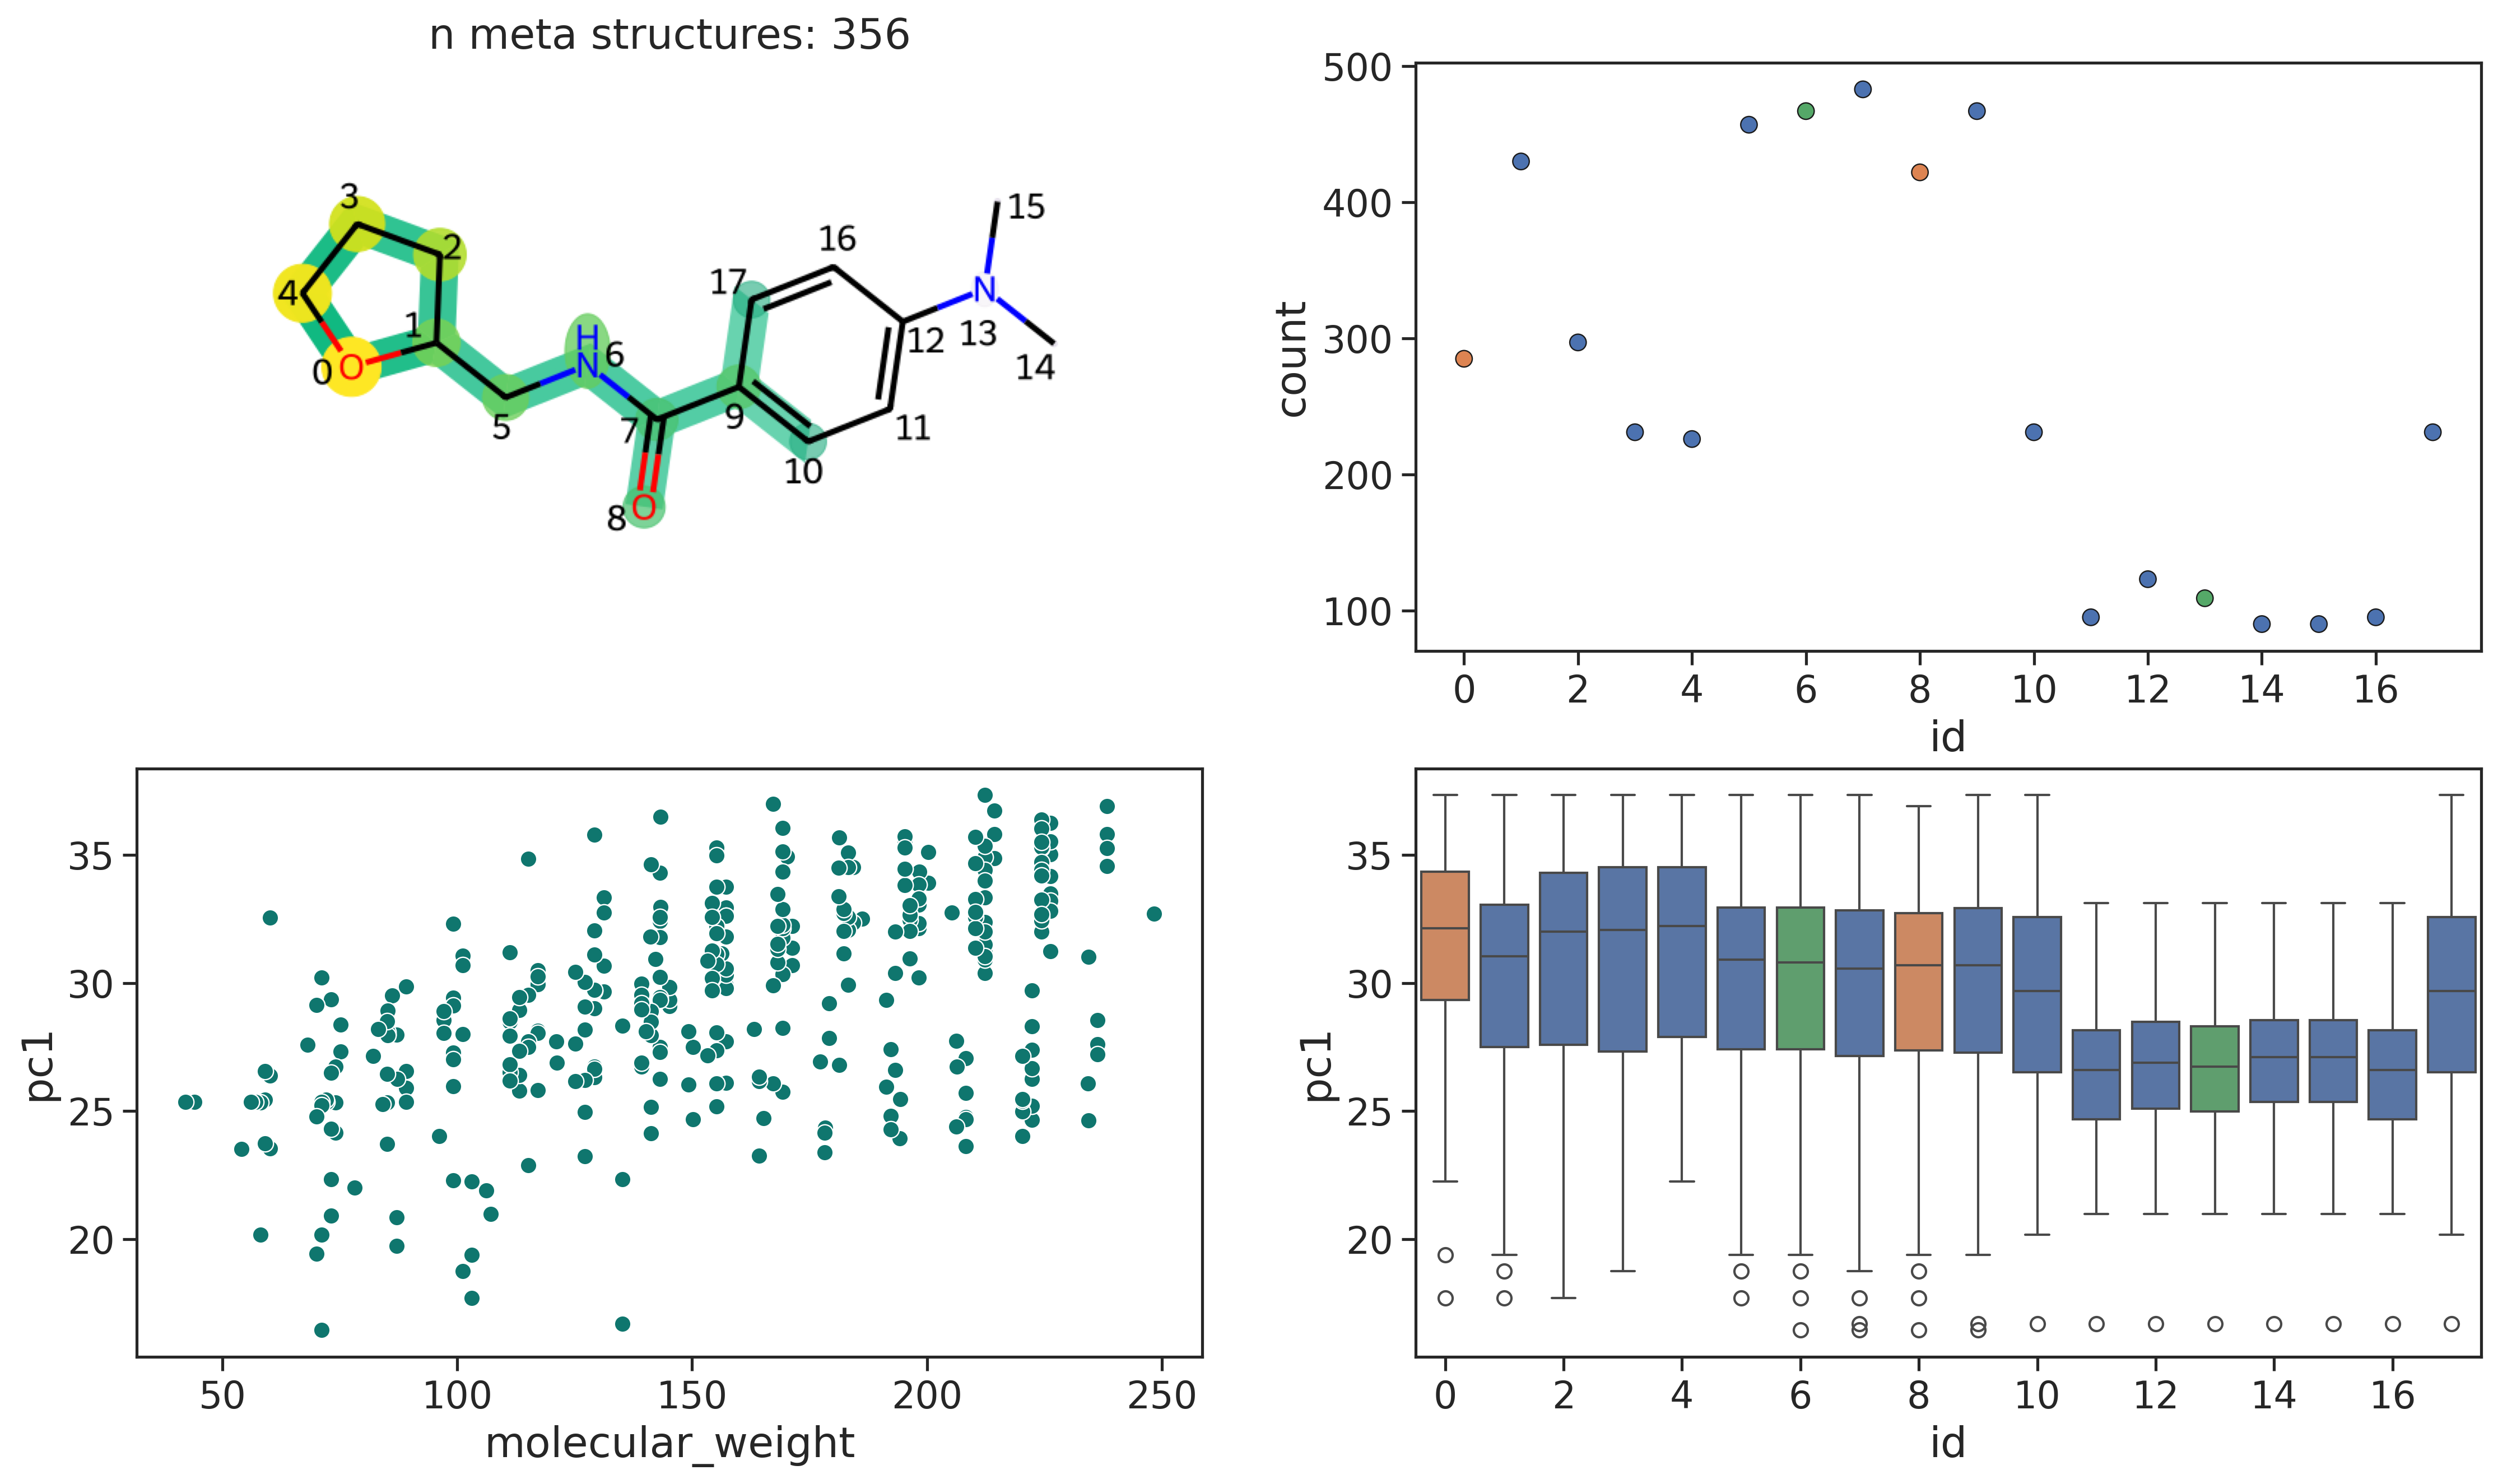

In [25]:
RDLogger.DisableLog('rdApp.*')
from rdkit import RDLogger
from visulization import processed_data,generate_visualization
sns.set_theme(rc={"figure.dpi": 300,
                  'figure.figsize': [6,4],
             #     'font.family':'Arial',
                  'legend.fontsize': 12,
                  'axes.labelsize': 18.0,
                  'xtick.labelsize': 16.0,
                  'ytick.labelsize': 16.0},
              style="ticks")
processed_data = process_attention_data('datasets/sampled_tdc/knn3/cav3_t-type_calcium_channels_butkiewicz/fragtest.csv',
                  'tdc/hts/checkpoints_cav3_t-type_calcium_channels_butkiewicz/attention/results/attention_weights.npy',
                  'O1C(CCC1)CNC(=O)c1ccc(N(C)C)cc1')
fig = generate_visualization(processed_data)

In [27]:
processed_data

,pc1,smiles,mol,molecular_weight,compound,label
0,32.702698,CN(C)C1=CC=C(C(=O)NCC2CCCO2)C=C1,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6ac0>,248.326,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
1,35.806179,CC(=CC=CN(C)C)C(=O)NCC1CCCO1,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4d9900>,238.331,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
2,35.265179,C=C(C=CCN(C)C)C(=O)NCC1CCCO1,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4d99e0>,238.331,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
3,34.562641,CC(=CC=CC(=O)NCC1CCCO1)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4db3c0>,238.331,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
4,36.916302,C=C(C=CCC(=O)NCC1CCCO1)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4ddd60>,238.331,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
...,...,...,...,...,...,...
351,25.357908,CC=CC,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4dbba0>,56.108,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
352,25.347239,C=CC=O,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4d9200>,56.064,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
353,23.511650,C=CC=C,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4e5f90>,54.092,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
354,25.346937,CCC,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4dbd60>,44.097,<rdkit.Chem.rdchem.Mol object at 0x2b7a9b4f6890>,0
